In [19]:
# ! pip install seaborn
# ! pip install amplpy

In [20]:

from amplpy import AMPL, ampl_notebook

ampl = ampl_notebook(
    modules=["gurobi", "coin", "highs", "gokestrel"],  # modules to install
    license_uuid="default",  # license to use
)  # instantiate AMPL object and register magics

AMPL Development Version 20250318 (MSVC 19.43.34808.0, 64-bit)
Demo license with maintenance expiring 20270131.
Using license file "c:\Users\premp\AppData\Local\Programs\Python\Python312\Lib\site-packages\ampl_module_base\bin\ampl.lic".



In [21]:
ampl.reset()


In [22]:

%%ampl_eval
var x1 >= 0;
var x2 >= 0;

maximize benefit: 3 * x1 + 5 * x2;

s.t. max_plant1: x1 <= 4;
s.t. max_plant2: x2 <= 6;
s.t. energy_mix: 3 * x1 + 2 * x2 <= 18;


In [23]:

ampl.option["solver"] = "gurobi"
ampl.solve()

# Get optimal values
x1_opt = ampl.var["x1"].value()
x2_opt = ampl.var["x2"].value()
opt_val = ampl.obj["benefit"].value()

print(f"x = ({x1_opt:.2f}, {x2_opt:.2f})")
print(f"Optimal Benefit = {opt_val:.2f}")


Gurobi 12.0.1: 

Gurobi 12.0.1: optimal solution; objective 36
1 simplex iteration
x = (2.00, 6.00)
Optimal Benefit = 36.00


In [24]:
# exhibit the model that has been built
ampl.eval("show;")
ampl.eval("expand;")


variables:   x1   x2

constraints:   energy_mix   max_plant1   max_plant2

objective:   benefit
maximize benefit:
	3*x1 + 5*x2;

subject to max_plant1:
	x1 <= 4;

subject to max_plant2:
	x2 <= 6;

subject to energy_mix:
	3*x1 + 2*x2 <= 18;



In [25]:
ampl.option["solver"] = 'gurobi'
ampl.solve()

print(f'x = ({ampl.var["x1"].value():.1f}, {ampl.var["x2"].value():.1f})')
print(f'optimal value = {ampl.obj["benefit"].value():.2f}')

Gurobi 12.0.1:Gurobi 12.0.1: optimal solution; objective 36
0 simplex iterations
x = (2.0, 6.0)
optimal value = 36.00


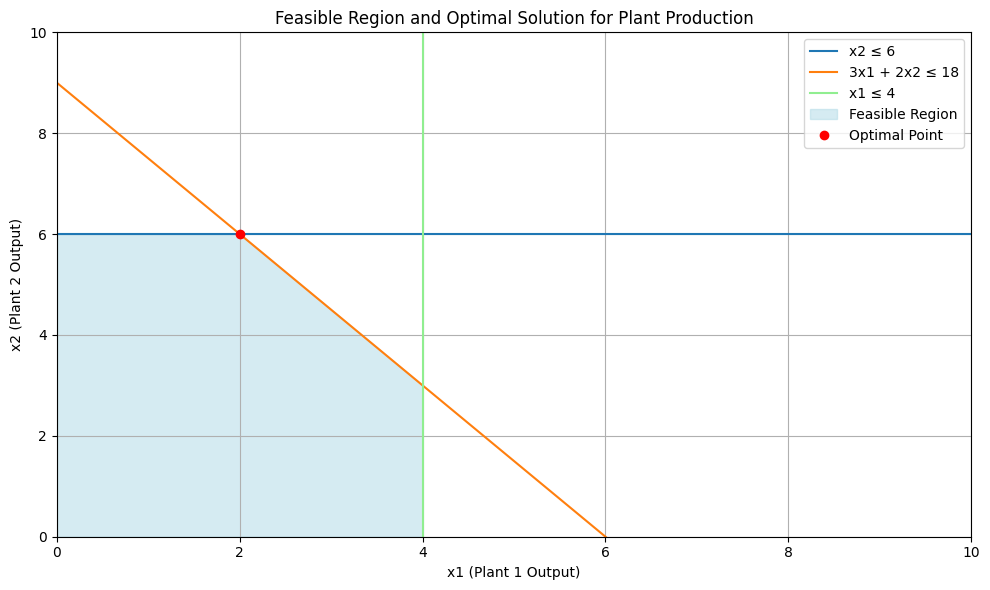

In [26]:

import numpy as np
import matplotlib.pyplot as plt

# Optimal solution values
x1_opt = ampl.var["x1"].value()
x2_opt = ampl.var["x2"].value()

# Define x1 values
x1_vals = np.linspace(0, 10, 400)

# Constraints
x2_plant2 = np.full_like(x1_vals, 6)
x2_energy_mix = (18 - 3 * x1_vals) / 2

# Feasible region
x1_feas = np.linspace(0, 4, 400)
x2_feasible = np.minimum.reduce([
    6 * np.ones_like(x1_feas),
    (18 - 3 * x1_feas) / 2
])
x2_feasible = np.maximum(0, x2_feasible)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x1_vals, x2_plant2, label='x2 ≤ 6')
plt.plot(x1_vals, x2_energy_mix, label='3x1 + 2x2 ≤ 18')
plt.axvline(4, color='lightgreen', label='x1 ≤ 4')
plt.fill_between(x1_feas, 0, x2_feasible, color='lightblue', alpha=0.5, label='Feasible Region')

# Optimal point
plt.plot(x1_opt, x2_opt, 'ro', label='Optimal Point')

# Labels and formatting
plt.xlabel('x1 (Plant 1 Output)')
plt.ylabel('x2 (Plant 2 Output)')
plt.title('Feasible Region and Optimal Solution for Plant Production')
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
